## Colour ranges
the HSV ranges like H from 0-179, S and V from 0-255

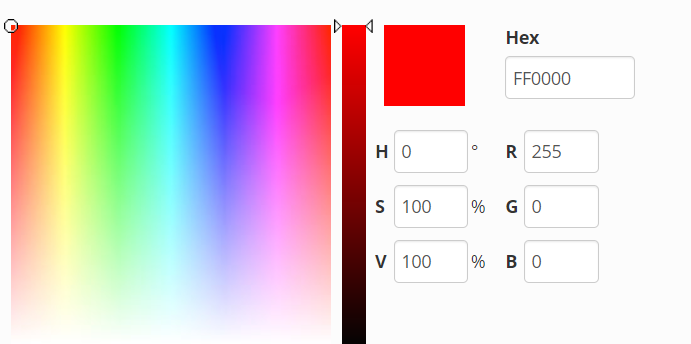

https://alloyui.com/examples/color-picker/hsv.html

In [34]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np

lower_red = (0,100,50)
upper_red = (0,255,255)

# test_file = 'Images\\local_image_0.jpg'
# img_RGB = cv2.cvtColor(cv2.imread(test_file), cv2.COLOR_BGR2RGB)
# img_HSV = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2HSV)

# mask = cv2.inRange(img_HSV, lower_red, upper_red)
# result = cv2.bitwise_and(img_HSV, img_HSV, mask=mask)

# plt.subplot(1, 2, 1)
# plt.imshow(mask, cmap="gray")
# plt.subplot(1, 2, 2)
# plt.imshow(result)
# plt.show()

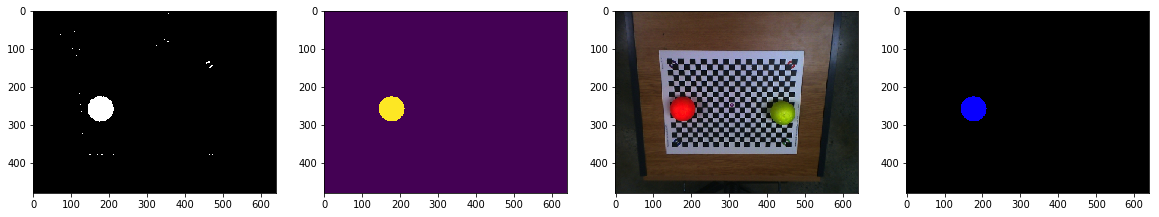

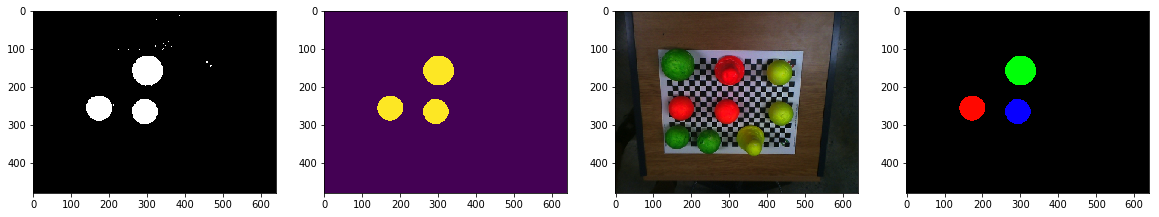

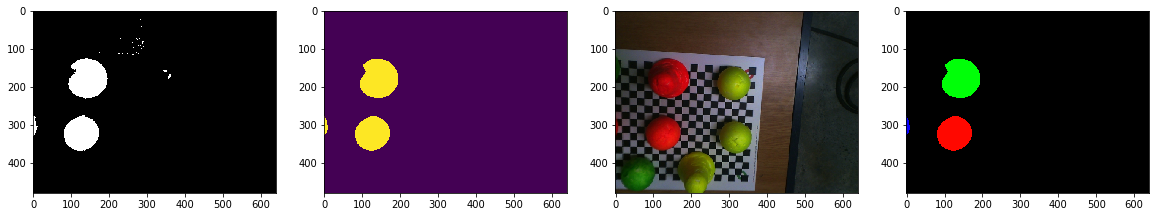

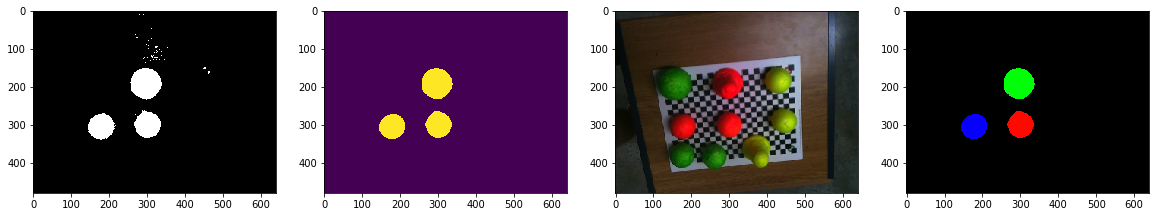

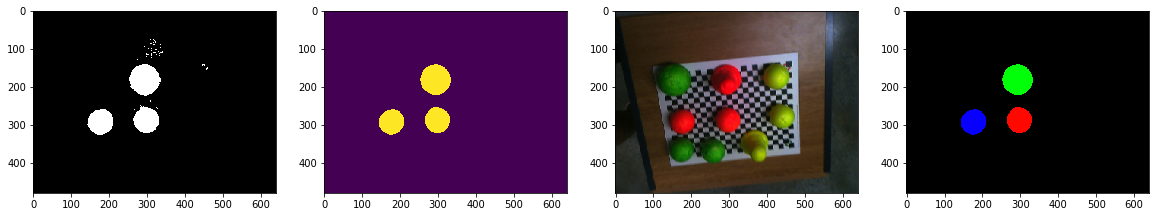

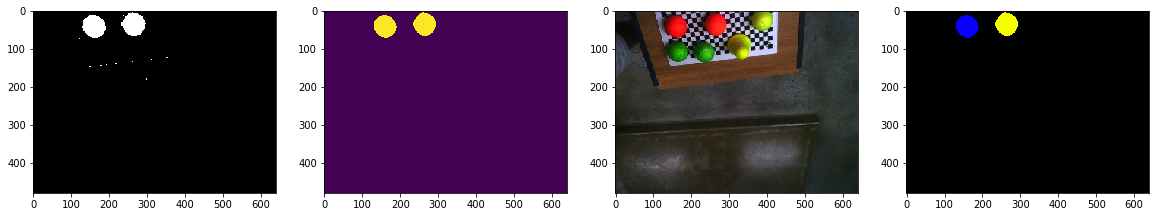

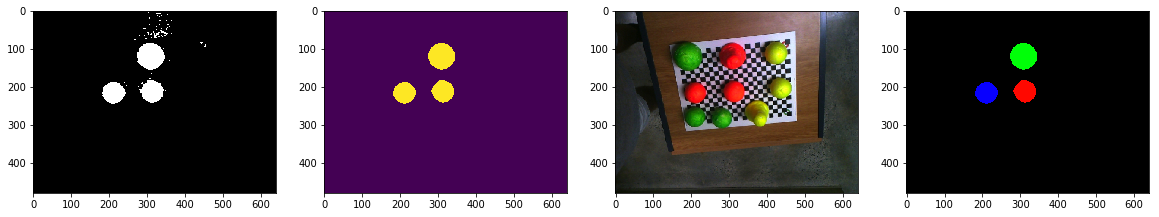

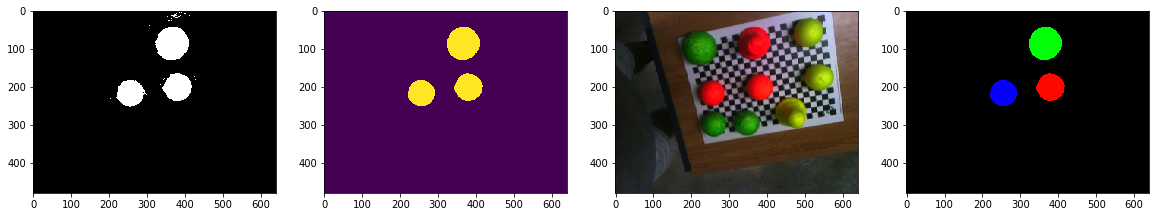

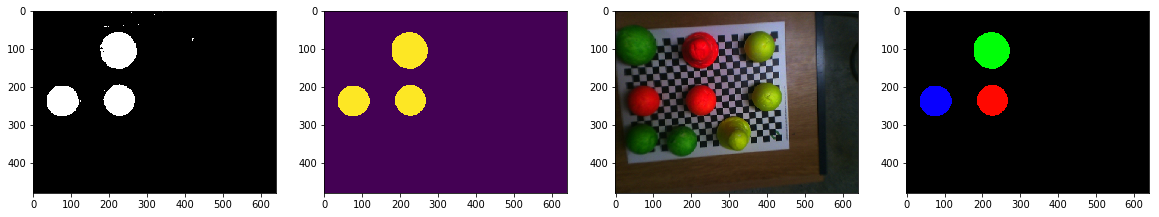

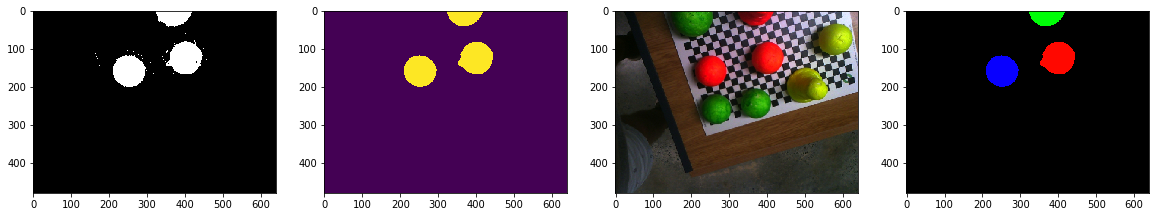

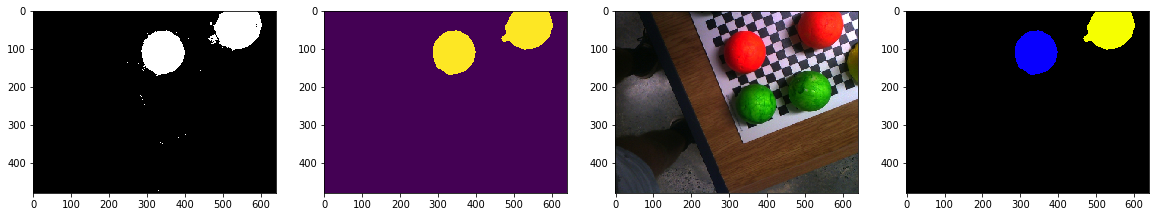

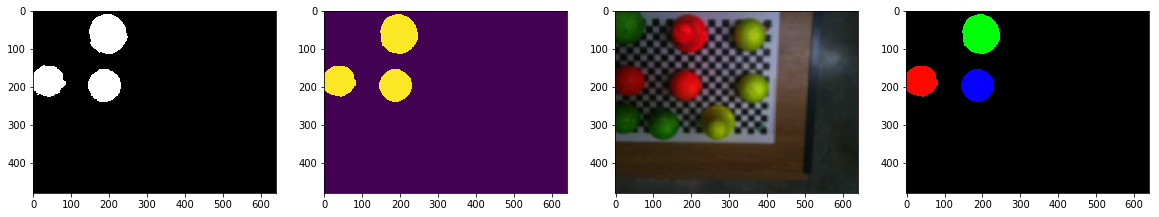

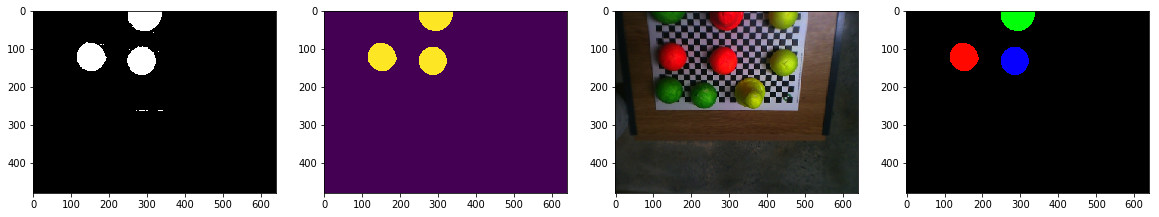

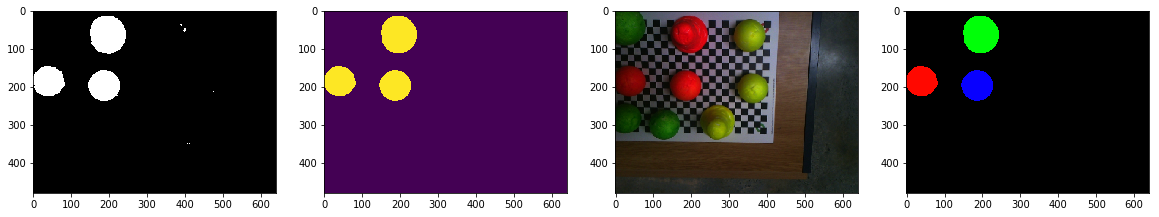

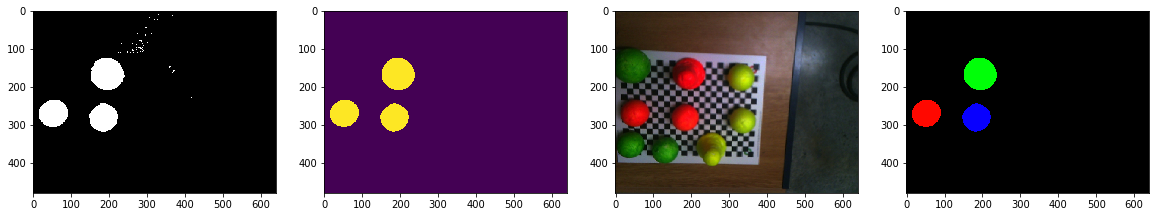

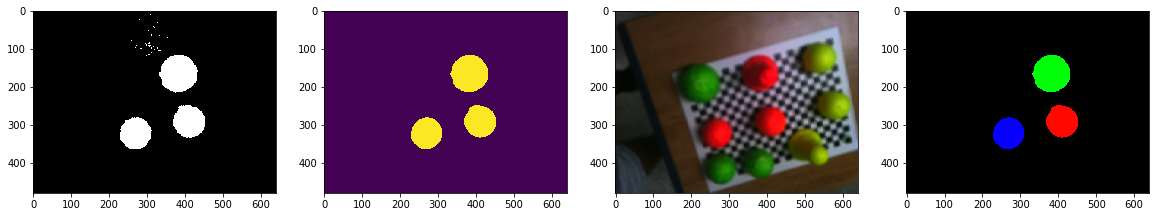

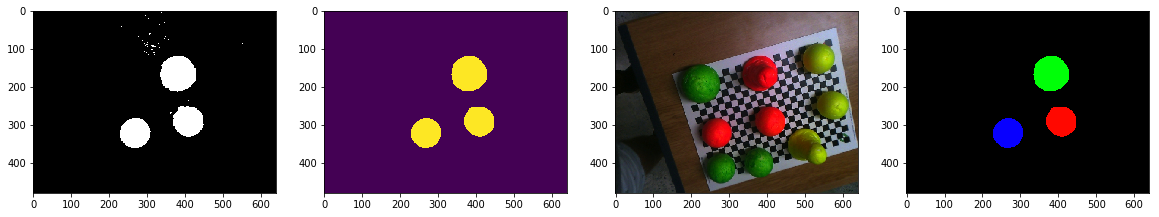

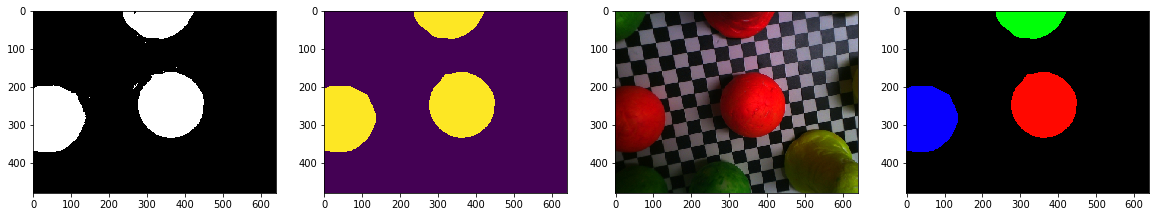

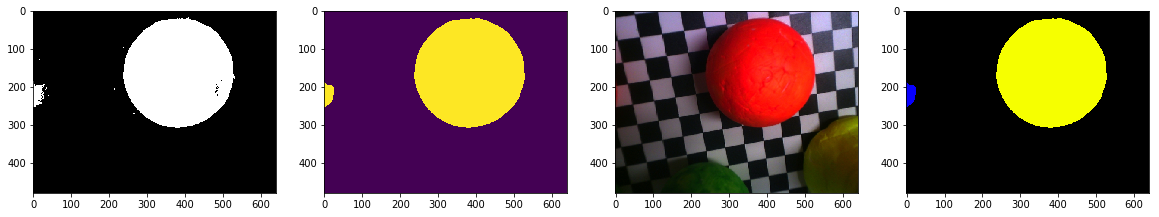

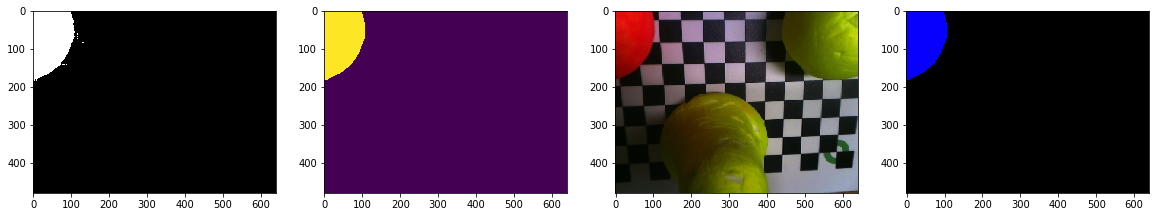

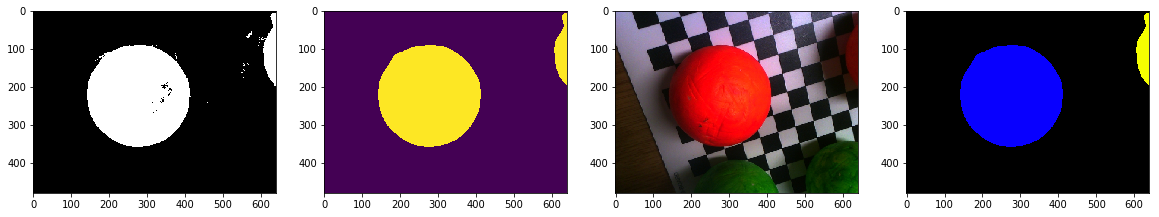

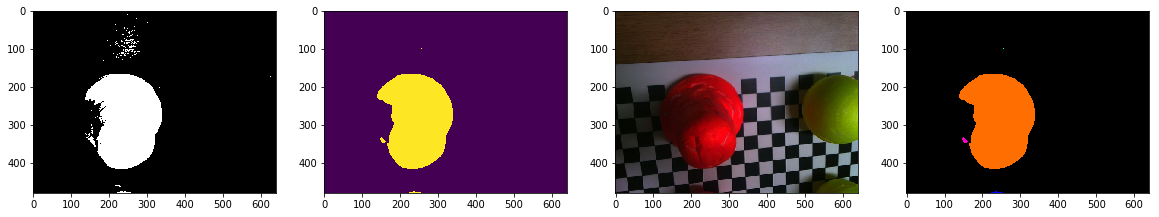

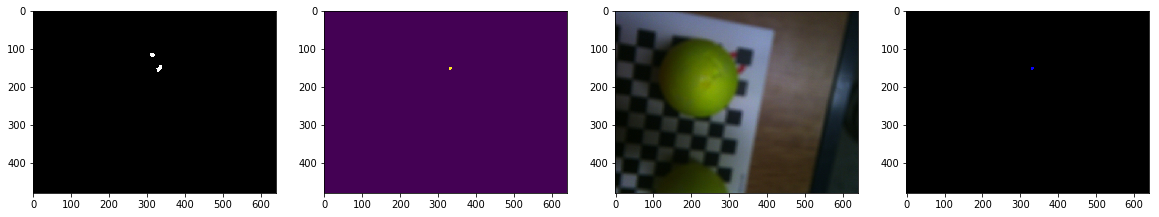

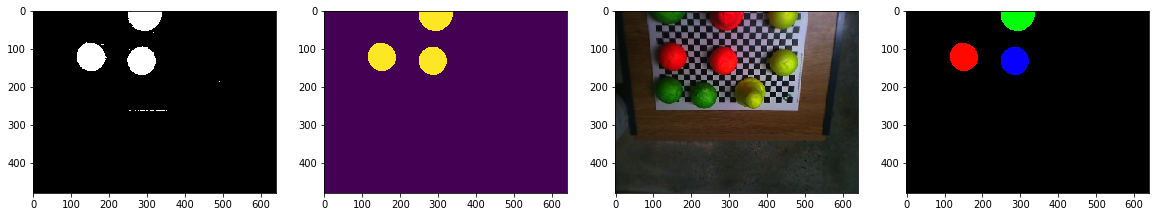

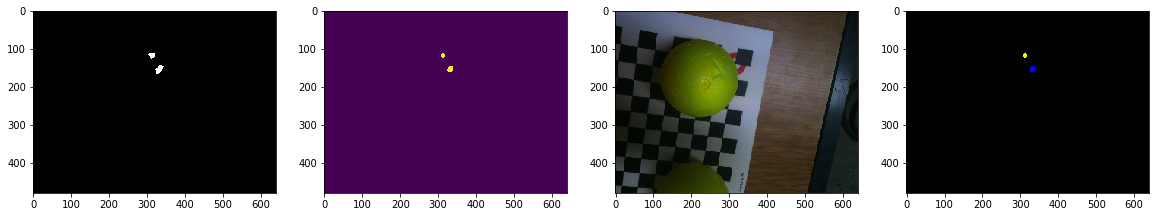

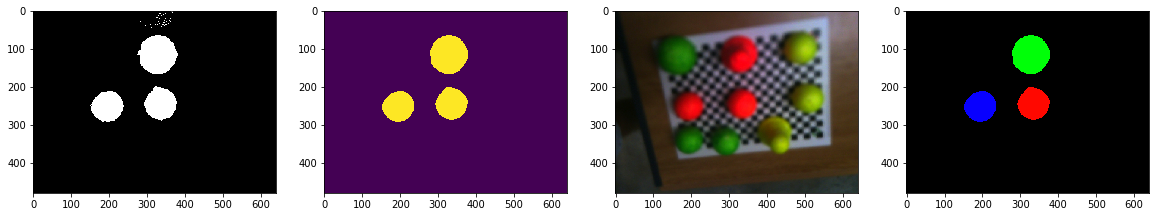

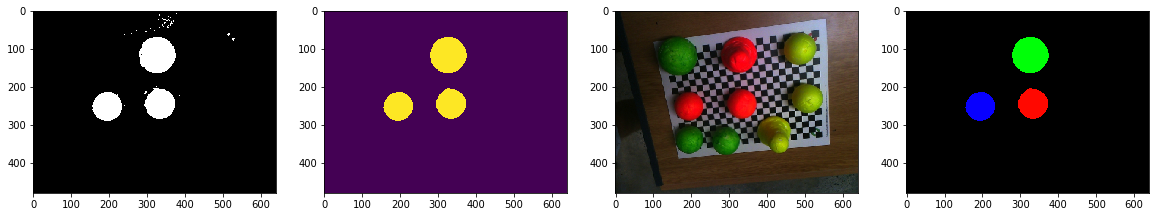

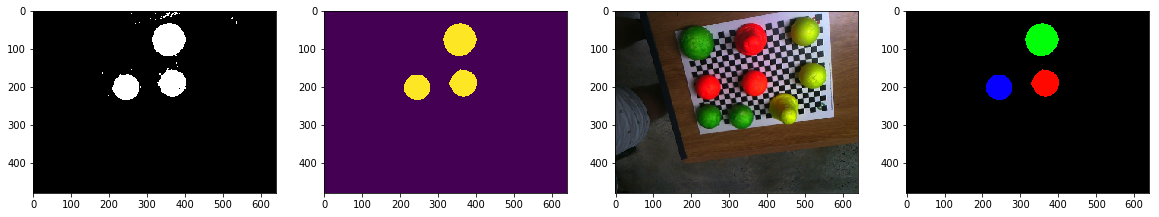

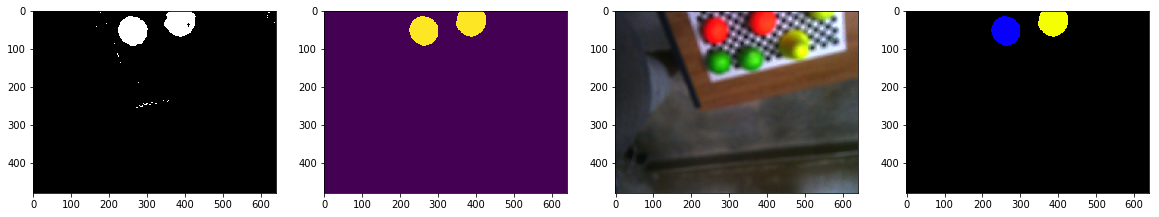

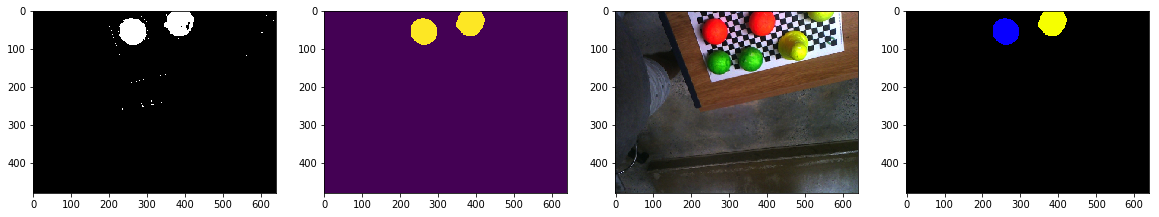

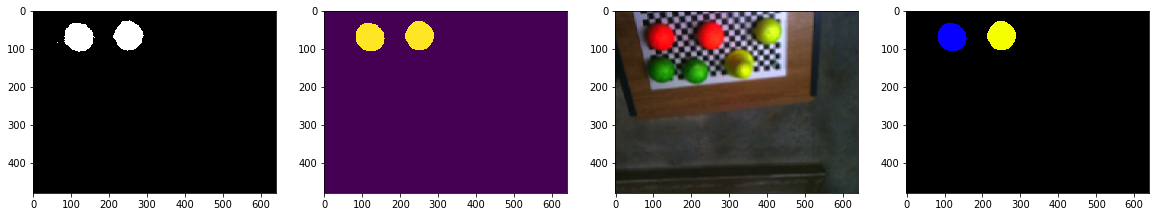

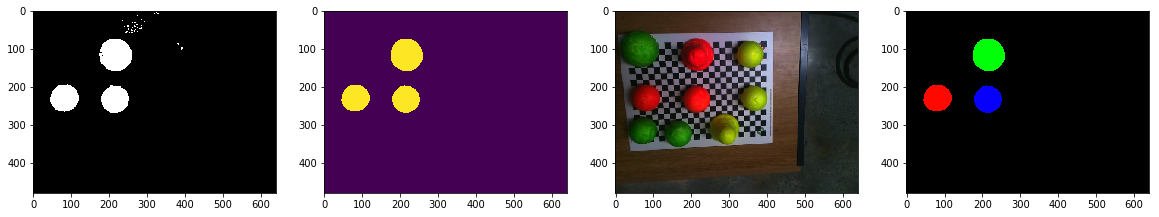

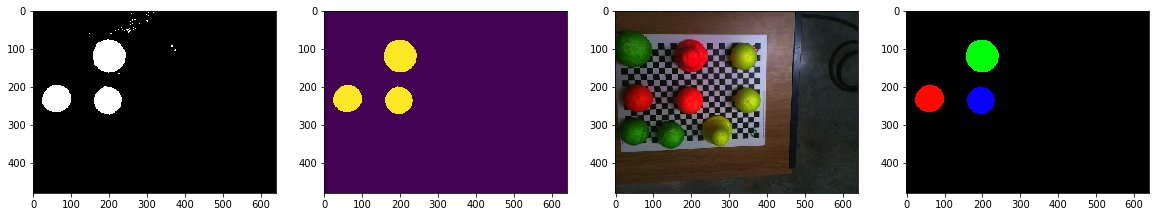

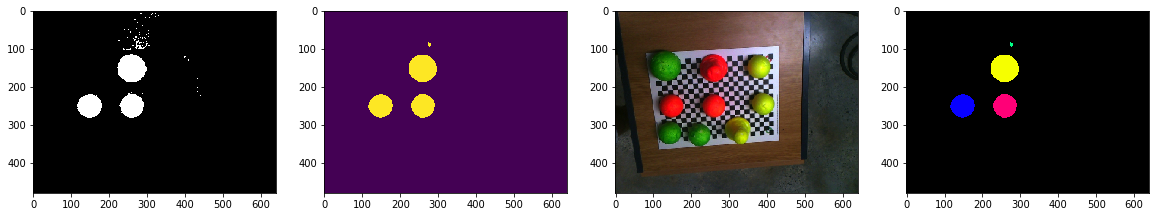

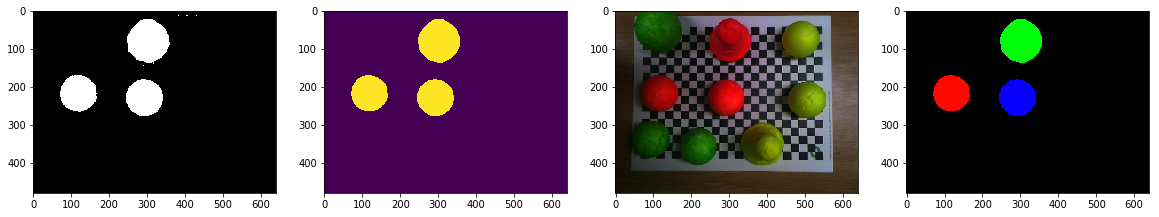

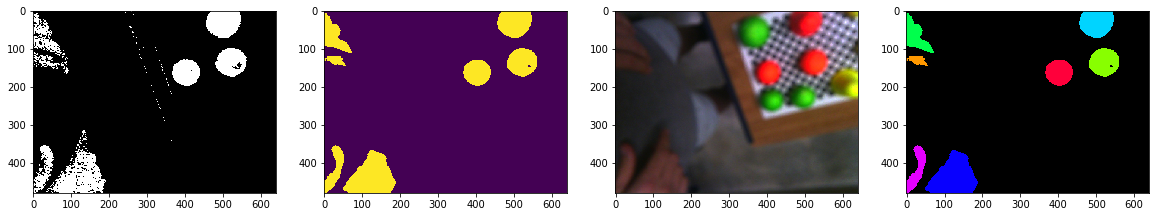

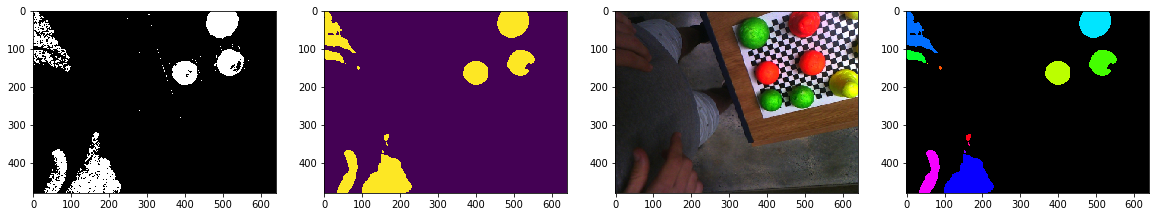

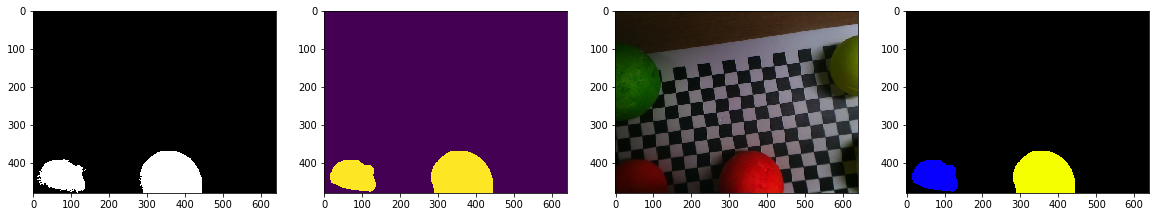

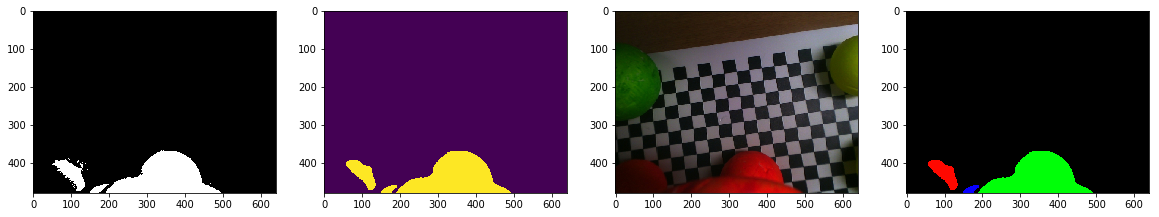

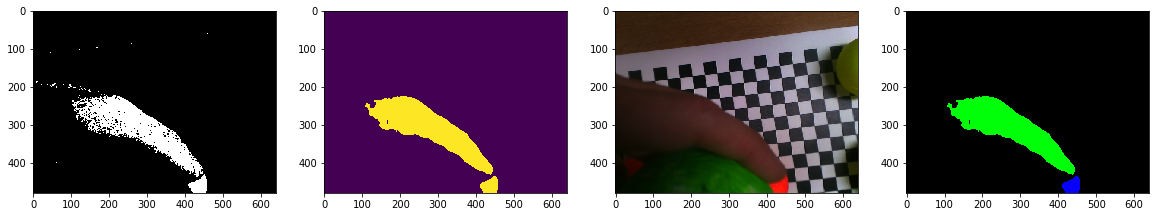

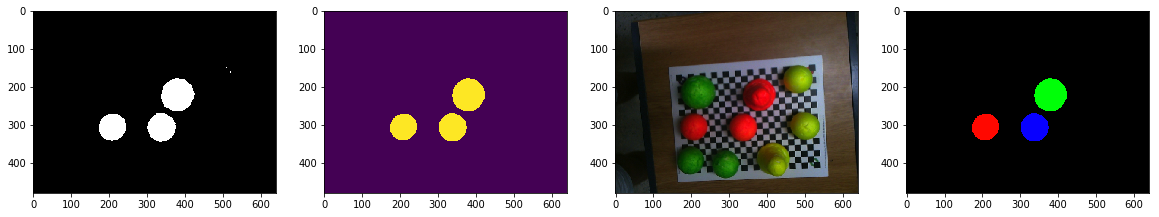

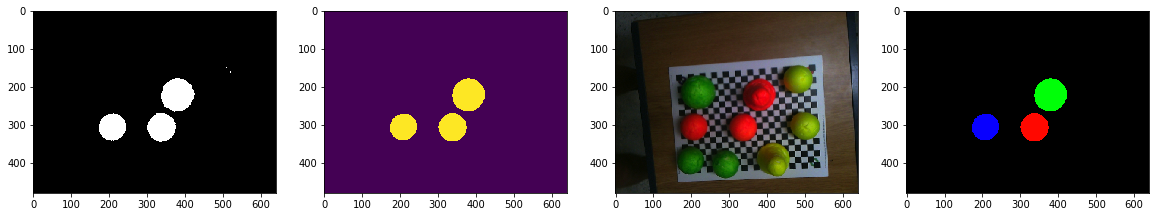

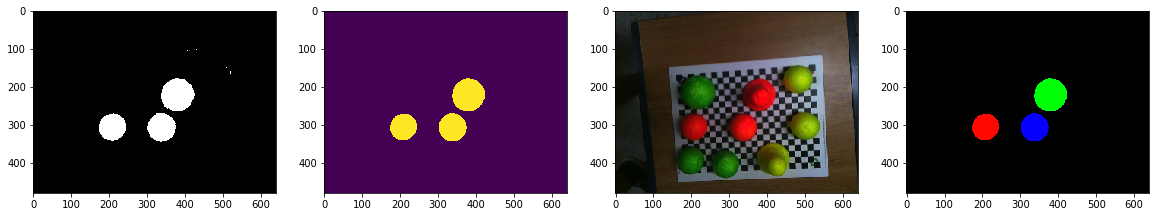

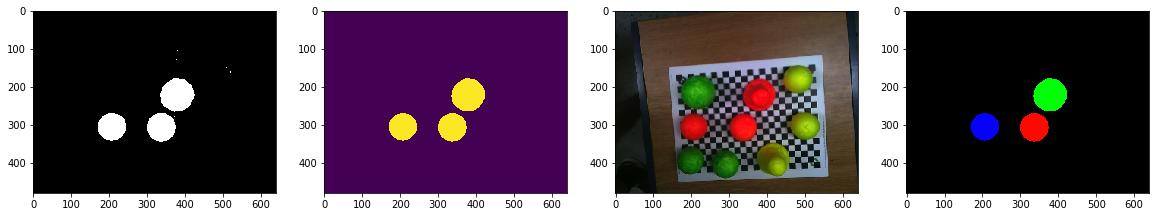

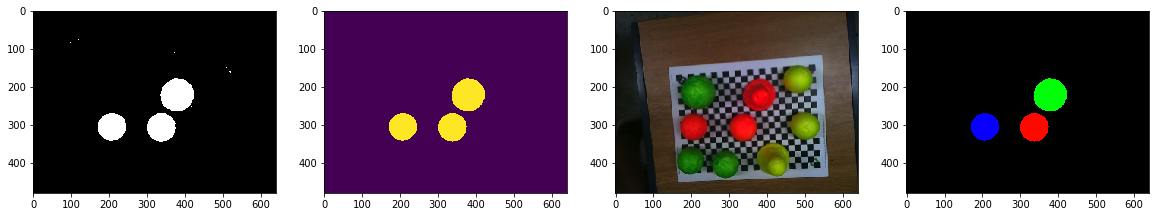

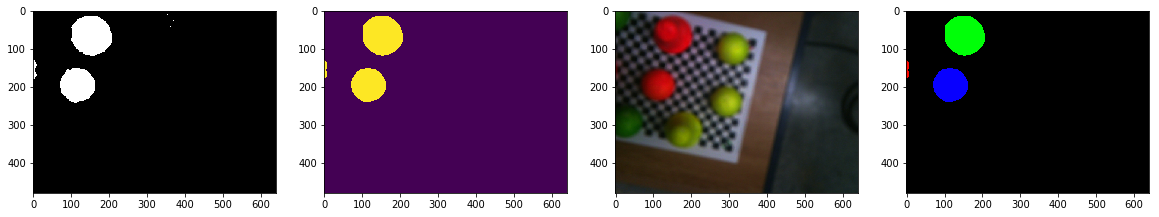

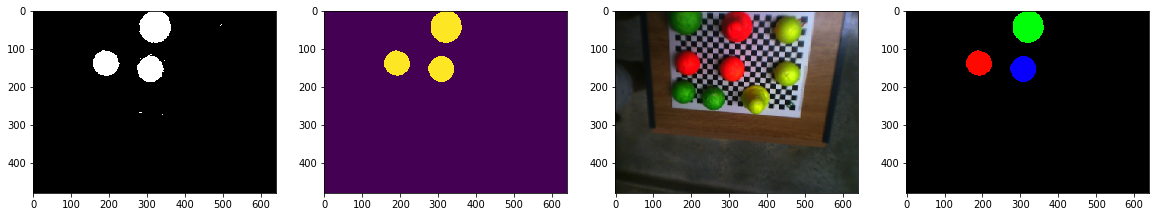

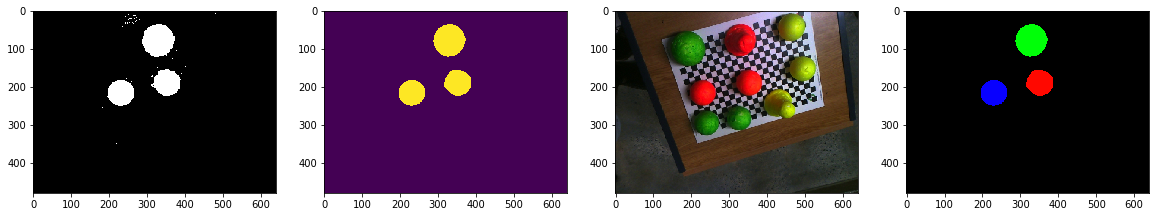

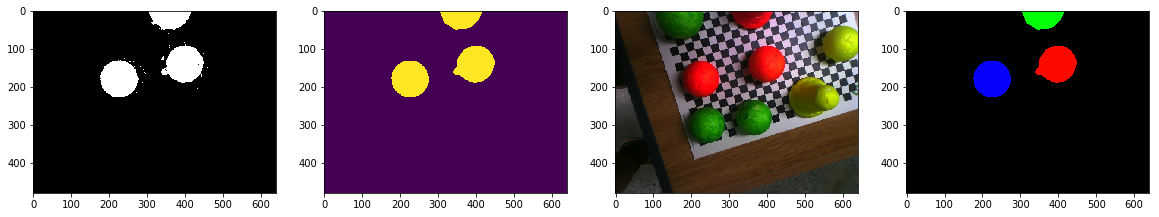

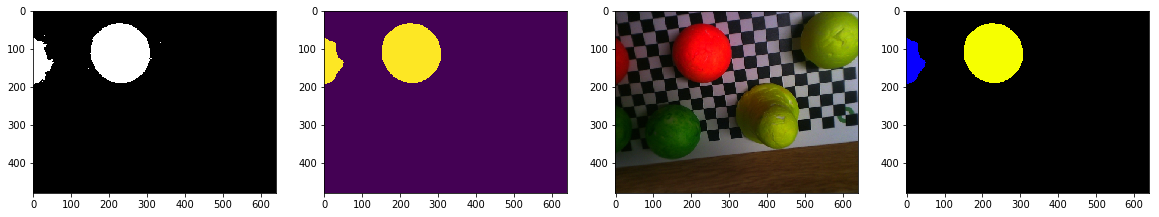

In [45]:
files = glob.glob("Images/*")

# two ranges because red stretchs over the Hue colour range
lower_red_1 = (0,100,50)
upper_red_1 = (5,255,255)

lower_red_2 = (170,100,50)
upper_red_2 = (180,255,255)


for f in files:
    # reading in image to RGB and HSV
    img_RGB = cv2.cvtColor(cv2.imread(f), cv2.COLOR_BGR2RGB)
    img_HSV = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2HSV)
    
    # Create two masks
    mask1 = cv2.inRange(img_HSV, lower_red_1, upper_red_1)
    mask2 = cv2.inRange(img_HSV, lower_red_2, upper_red_2)
    
    # XOR masks
    mask = cv2.bitwise_xor(mask1, mask2)
    
    # bitwise and with image
    result = cv2.bitwise_and(img_HSV, img_HSV, mask=mask)
    
    
    # put median blur over the top
    median = cv2.medianBlur(mask,17)
    
    # find connected components
    ret, labels = cv2.connectedComponents(median)
    
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0
    
    # print out figures
    figure = plt.figure(figsize=(20,20))
    plt.subplot(1, 4, 1)
    # mask
    plt.imshow(mask, cmap="gray")
    plt.subplot(1, 4, 2)
    # median blue
    plt.imshow(median)
    #original image
    plt.subplot(1, 4, 3)
    plt.imshow(img_RGB)
    # final 
    plt.subplot(1, 4, 4)
    plt.imshow(labeled_img)
    
    plt.show()

In [36]:
ret, labels = cv2.connectedComponents(median)

In [37]:
ret

4

In [38]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [39]:
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

# cvt to BGR for display
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

# set bg label to black
labeled_img[label_hue==0] = 0

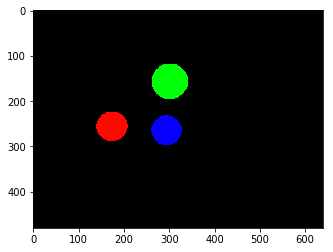

In [40]:
plt.imshow(labeled_img)

In [6]:
# cv2.imshow('est', mask)
# cv2.waitKey()

113

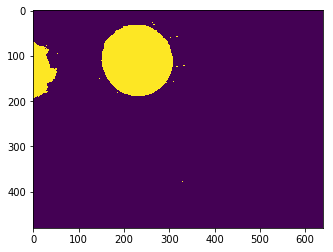

In [80]:
plt.imshow(img_RGB)
plt.show()

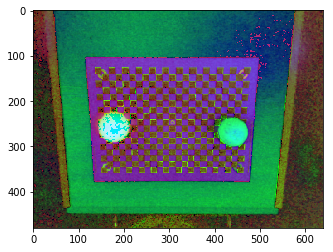

In [55]:
plt.imshow(img_HSV)
plt.show()